# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



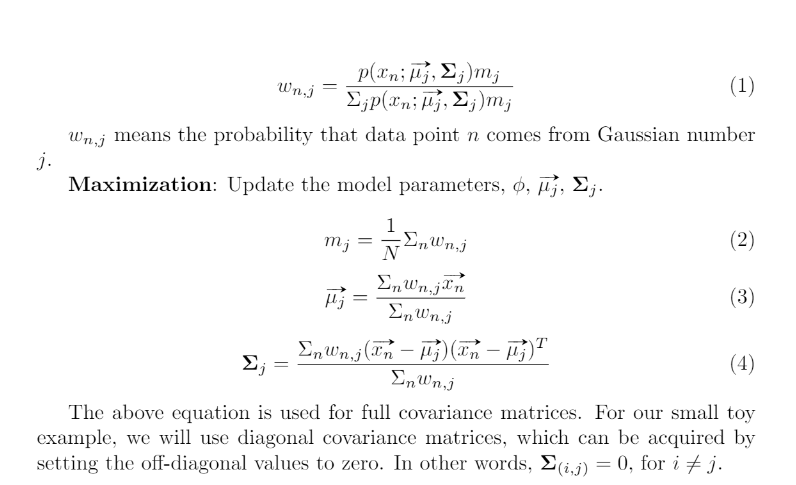

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [3]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = np.array(mixture_weight)
        self.mean_params = np.array(mean_params)
        self.cov_params = np.array(cov_params)

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """

        # INSERT CODE HERE
        w = np.array([self.mixture_weight[i] * multivariate_normal.pdf(data, self.mean_params[i], self.cov_params[i]) for i in range(self.mixture_weight.shape[0])]).T
        w = w / np.sum(w, axis=1)[:, None]
        return w


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        self.mixture_weight = np.mean(w, axis=0)
        for i in range(self.mixture_weight.shape[0]):
            self.mean_params[i] = np.dot(w[:, i], data) / np.sum(w[:, i], axis=0)
        self.cov_params = np.array([np.dot(w[:, i] * (data - self.mean_params[i]).T, (data - self.mean_params[i])) / np.sum(w[:, i]) for i in range(self.mixture_weight.shape[0])])
        for i in range(self.mixture_weight.shape[0]):
            self.cov_params[i] = np.diag(np.diag(self.cov_params[i]))        


    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        # INSERT CODE HERE
        log_prob = np.sum(np.log(np.sum([self.mixture_weight[i] * multivariate_normal.pdf(data, self.mean_params[i], self.cov_params[i]) for i in range(self.mixture_weight.shape[0])], axis=0)))
        return log_prob

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        log_prob_list.append(self.get_log_likelihood(data))
        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # INSERT CODE HERE
            self.maximization_step(data, self.estimation_step(data))
            log_prob_list.append(self.get_log_likelihood(data))


            # Calculate log prob.
            # log_prob = get_log_likelihood(data)
            # log_prob_list.append(log_likelihood)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return np.array(log_prob_list)
    
    def plot_log_likelihood(self, log_prob_list):
        x = np.arange(0, log_prob_list.shape[0], 1)
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Log likelihood with initial prob")
        plt.xlabel("Iterations")
        plt.ylabel("Log likelihood")
        plt.plot(x, log_prob_list, marker="o")

        plt.subplot(1, 2, 2)
        plt.title("Log likelihood without initial prob")
        plt.xlabel("Iterations")
        plt.plot(x[1:], log_prob_list[1:], marker="o")
        plt.show()

In [4]:
num_iterations = 3
num_mixture = 3
mixture_weight = np.array([1] * num_mixture) # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)

In [5]:
log_prob_list1 = gmm.perform_em_iterations(data, 3, display=True)

Initialization
m :
 [1 1 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.40711618 0.25954961 0.33333421]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]
-------------------------------------------------------------
Iteration: 

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



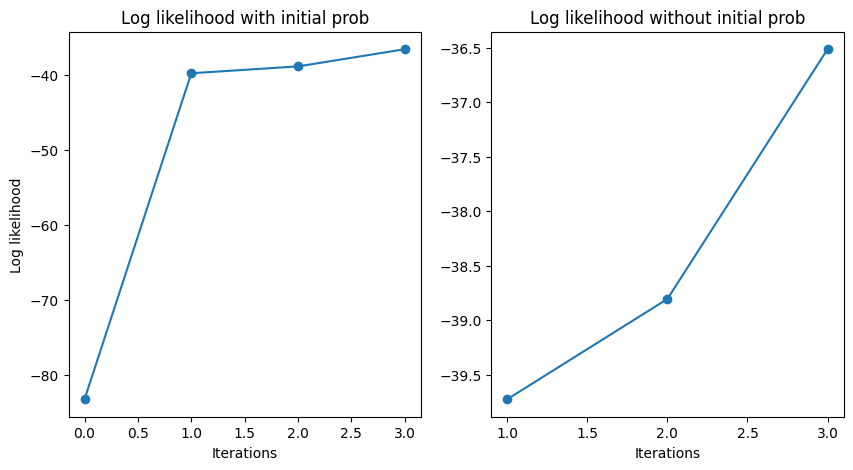

In [6]:
# TODO
gmm.plot_log_likelihood(log_prob_list1)

    ANS : Yes, it goes up every iteration just as we learned in class.

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [7]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, 3, display=True)

Initialization
m :
 [1 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]

 [[4.66807754 0.        ]
  [0.         2.89104566]]

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

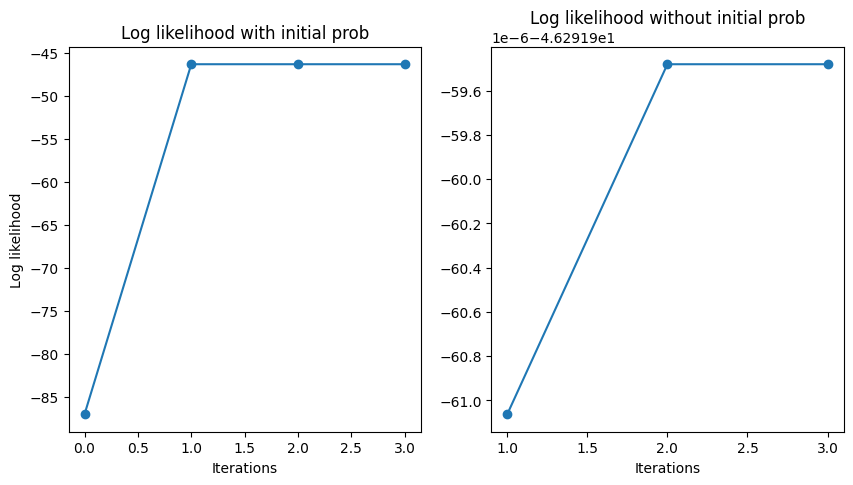

In [8]:
# TODO: Plot log_likelihood from T3
gmm2.plot_log_likelihood(log_prob_list2)

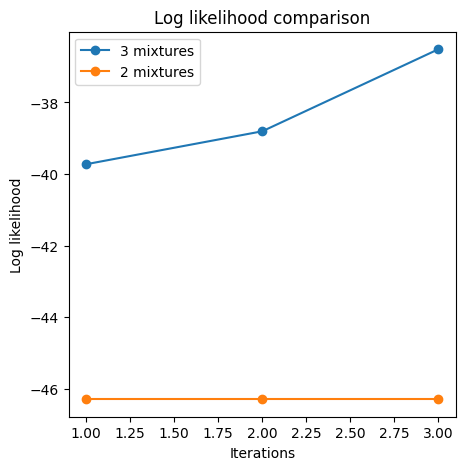

In [9]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
x = np.arange(1, log_prob_list1.shape[0], 1)
plt.figure(figsize=(5, 5))
plt.title("Log likelihood comparison")
plt.xlabel("Iterations")
plt.ylabel("Log likelihood")
plt.plot(x, log_prob_list1[1:], marker="o", label="3 mixtures")
plt.plot(x, log_prob_list2[1:], marker="o", label="2 mixtures")
plt.legend()
plt.show()

    ANS : 3 mixtures has the better likelihood.

# The face database

In [10]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [11]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape
%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [12]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
print(xf.shape, data['facedata'][0,0].shape)
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

(40, 10, 56, 46) (56, 46)


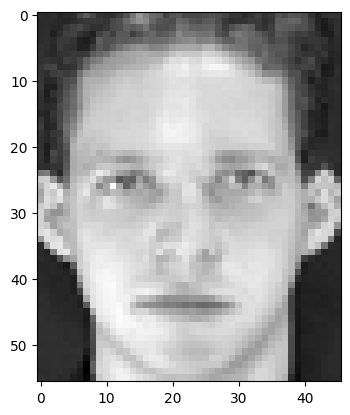

In [13]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [14]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.sqrt(np.sum((x1 - x2)**2))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


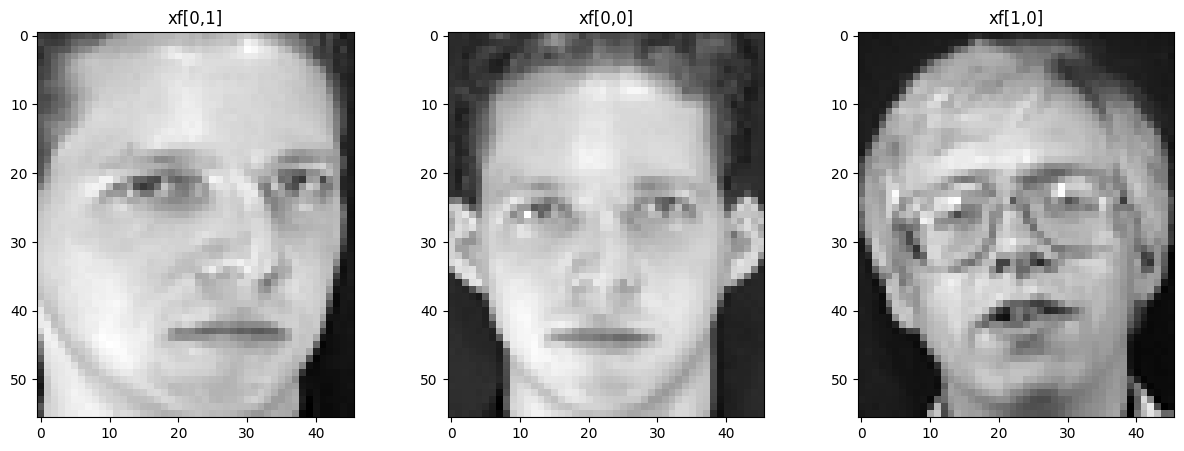

In [15]:
# TODO: Show why does the numbers make sense
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
plt.imshow(xf[0,0], cmap = 'gray')
plt.title('xf[0,0]')

plt.subplot(1, 3, 1)
plt.imshow(xf[0,1], cmap = 'gray')
plt.title('xf[0,1]')

plt.subplot(1, 3, 3)
plt.imshow(xf[1,0], cmap = 'gray')
plt.title('xf[1,0]')
plt.show()

    ANS : Yes, it's making sense. Face area of xf[0,0] and xf[1,0] is almost same, but xf[0,1]'s face is closer make distance value is raised. So, it's useful for face verification.

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [16]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    return matrix.reshape(matrix.shape[0]*matrix.shape[1], -1)


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    similarity_matrix = np.array([[L2_dist(A[i], B[j]) for j in range(B.shape[0])] for i in range(A.shape[0])])

    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

(120, 280)


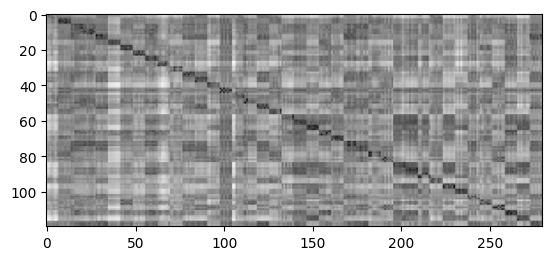

In [17]:
#TODO: Show similariry matrix between T and D.

# INSERT CODE HERE
T = organize_shape(xf[:, :3])
D = organize_shape(xf[:, 3:])
similarity_matrix = generate_similarity_matrix(T, D)
plt.imshow(similarity_matrix, cmap='gray')
print(similarity_matrix.shape)
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


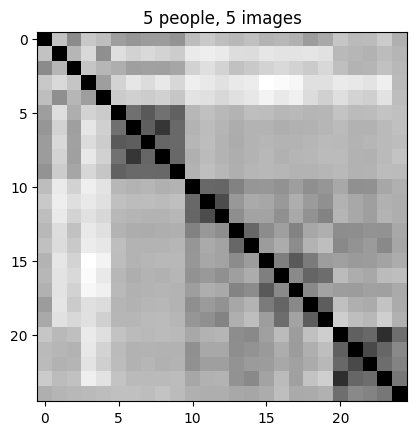

In [18]:
# INSERT CODE HERE
T2 = organize_shape(xf[:5, :5])
similarity_matrix2 = generate_similarity_matrix(T2, T2)
plt.title('5 people, 5 images')
plt.imshow(similarity_matrix2, cmap='gray')
# print(similarity_matrix.max(), similarity_matrix.min())
plt.show()

        ANS : Mean that 5 pictures from person #2 are have some pattern that make distance in their group is low. But for person #1, it's like that picture in their is not that similar make distace in their group is high.

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [19]:
def evaluate_performance(similarity_matrix, threshold, sizeT, sizeD):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    similarity_matrix = similarity_matrix.reshape(similarity_matrix.shape[0]//sizeT, sizeT, -1).transpose(0, 2, 1)
    similarity_matrix = similarity_matrix.min(axis=2)
    true = np.zeros(similarity_matrix.shape)
    for i in range(similarity_matrix.shape[0]):
        true[i, i*sizeD:(i+1)*sizeD] = 1
    # plt.imshow(true, cmap='gray')

    tp = np.sum(similarity_matrix[true == 1] < threshold) / np.sum(true == 1)
    fp = np.sum(similarity_matrix[true == 0] < threshold) / np.sum(true == 0)
    tn = np.sum(similarity_matrix[true == 0] >= threshold) / np.sum(true == 0)
    fn = np.sum(similarity_matrix[true == 1] >= threshold) / np.sum(true == 1)

    return tp, fp, tn, fn
# Quick check
# (true_pos_rate, false_neg_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 10, 3, 7)

(0.9964285714285714,
 0.4564102564102564,
 0.5435897435897435,
 0.0035714285714285713)

In [20]:
# INSERT CODE HERE
tp, fp, tn, fn = evaluate_performance(similarity_matrix, 10, 3, 7)
print('True positive rate:', tp)
print('False alarm rate:', fp)

True positive rate: 0.9964285714285714
False alarm rate: 0.4564102564102564


        ANS: True positive rate: 0.9964285714285714, False alarm rate: 0.4564102564102564

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [21]:
def calculate_roc(input_mat, FAR = None, EER = False):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """

    # INSERT CODE HERE
    N = 10000
    eps = 1e-5
    recall_at_FAR = []
    eer_rate = 0
    min_ratio_diff = 1e9
    mi, ma = input_mat.min(), input_mat.max() + 1e-5
    t = np.linspace(mi, ma, N)
    re = []
    tpr_list, far_list = np.zeros(N), np.zeros(N)
    
    for i, thr in enumerate(t):
        tpr_list[i], far_list[i] = evaluate_performance(input_mat, thr, 3, 7)[:2]
        if FAR is not None and FAR - eps < far_list[i] < FAR + eps:
            recall_at_FAR.append(tpr_list[i])
        if EER and tpr_list[i] > 0 and (1-far_list[i]) > 0 and abs(1 - tpr_list[i]/(1-far_list[i])) < min_ratio_diff:
            min_ratio_diff = abs(1 - tpr_list[i]/(1-far_list[i]))
            eer_rate = (tpr_list[i] + (1-far_list[i])) / 2

    re.append(tpr_list)
    re.append(far_list)
    if FAR is not None:
        re.append(np.mean(recall_at_FAR))
        # print(len(recall_at_FAR))
    if EER:
        re.append(eer_rate)
    return re

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    plt.figure(figsize=(5, 5))
    tpr_list, far_list = calculate_roc(input_mat)
    plt.plot(far_list, tpr_list)
    plt.xlabel('False Alarm Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC Curve')
    plt.show()

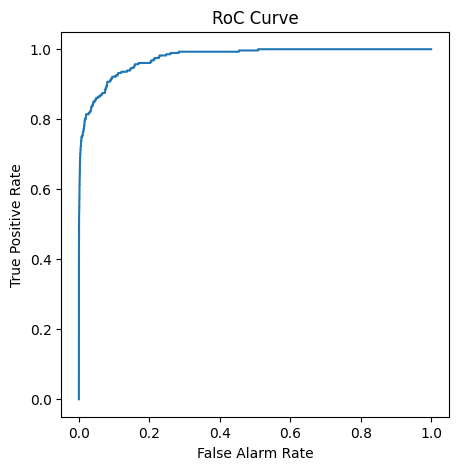

In [22]:
# INSERT CODE HERE
plot_roc(similarity_matrix)

    ANS: Minimum threshold should be min element of similarity matrix because it's lowest, we will predict this as false. Maximum threshold is the same way only the highest value should plus some epsilon to make sure it's not the same as the highest value and predict as true.

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [23]:
# You can add more parameter(s) to the function in the previous question.
_, _ , recall, eer = calculate_roc(similarity_matrix, 0.001, True)
print('Recall rate at 0.1% false alarm rate:', recall)
print('EER:', eer)
# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

Recall rate at 0.1% false alarm rate: 0.5459183673469387
EER: 0.9106227106227106


    ANS: Recall rate at 0.1% false alarm rate: 0.5459183673469387, EER: 0.9106227106227106

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

(120, 2576)
(2576,)


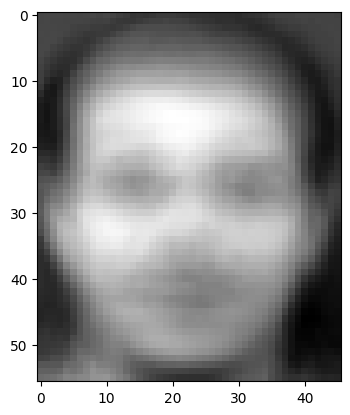

In [24]:
# INSERT CODE HERE
print(T.shape)
meanface = np.mean(T, axis=0)
print(meanface.shape)
plt.imshow(meanface.reshape(56, 46), cmap='gray')

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [25]:
# TODO: Find the size and the rank of the covariance matrix.

In [38]:
X = T.T - meanface.reshape(-1, 1)
print(X.shape)
cov = X @ X.T / X.shape[1]
print('Size of the covariance matrix:', cov.shape)
print('Rank of the covariance matrix:', np.linalg.matrix_rank(cov))

(2576, 120)
Size of the covariance matrix: (2576, 2576)
Rank of the covariance matrix: 119


    ANS: Size of the covariance matrix: (2576, 2576), Rank of the covariance matrix: 119


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [39]:
# TODO: Compute gram matrix.
gram_matrix = X.T @ X

In [40]:
# TODO: Show size and rank of Gram matrix.
print('Size of the Gram matrix:', gram_matrix.shape)
print('Rank of the Gram matrix:', np.linalg.matrix_rank(gram_matrix))

Size of the Gram matrix: (120, 120)
Rank of the Gram matrix: 119


    ANS: Size of the Gram matrix: (120, 120), Rank of the Gram matrix: 119


## T14. Is the Gram matrix also symmetric? Why?


    ANS: Yes because <xi,xj> = <xj,xi> for all i,j.

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [75]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

print('Positive Eigenvalues:', np.sum(eigenvalues > 1e-6))

Positive Eigenvalues: 119


    ANS: 199 of non-zero eigenvalues.

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

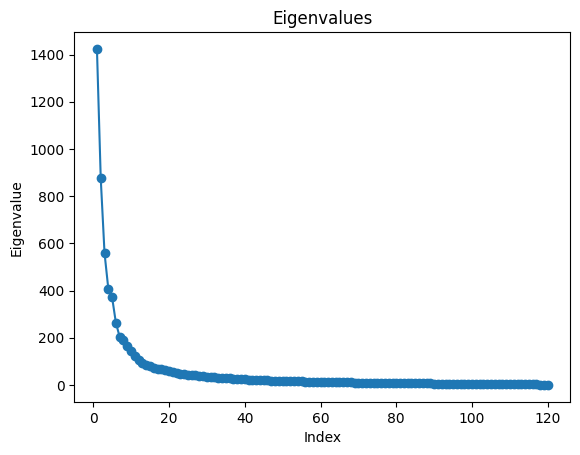

Number of eigenvectors to keep 95% of the variance: 64
6853.796339741126 6521.084810361782 0.9514558774601828


In [46]:
# INSERT CODE HERE
x = np.arange(1, eigenvalues.shape[0] + 1, 1)
plt.plot(x, eigenvalues, marker='o')
plt.title('Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

sum = np.sum(eigenvalues)
now = 0
for i in range(eigenvalues.shape[0]):
    now += eigenvalues[i]
    if now / sum > 0.95:
        print('Number of eigenvectors to keep 95% of the variance:', i + 1)
        break
print(sum, now, now / sum)
    

    ANS:

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [56]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = X @ eigenvectors
v = v / np.linalg.norm(v, axis=0)
print(v.shape)

(2576, 120)


In [54]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

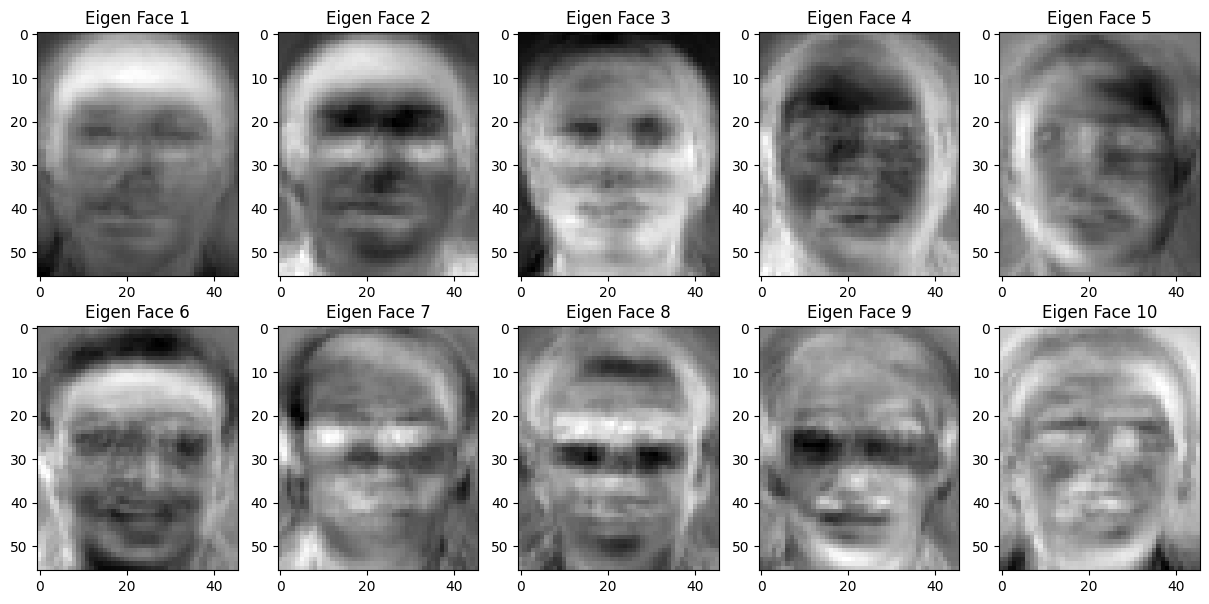

In [72]:
# TODO: Show the first 10 eigenvectors as images.
plt.figure(figsize=(15,7))
for i in range(2):
    for j in range(5):
        plt.subplot(2, 5, i*5 + j + 1)
        plt.title('Eigen Face ' + str(i*5 + j + 1))
        plt.imshow(v[:, i*5 + j].reshape(56, 46), cmap='gray')


### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS: First eigenface capture hair, and under eye area. Second eigneface capture hair, under eye area, and shirt at shoulder. 
    Yes, comparing xf[0,0] and xf[1,0] have different hair color but eye is hard to tell.

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [ ]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE

    return projection_vectors

In [ ]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = ...
T_reduced = ...
D_reduced = ...


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

In [ ]:
# TODO: Get similarity matrix of T_reduced and D_reduced

In [ ]:
# TODO: Find EER and the recall rate at 0.1% FAR.

    ANS:

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [ ]:
# INSERT CODE HERE

    ANS:

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS:

In [ ]:
# TODO: Define dimension of PCA.
n_dim = ...

# TODO: Find PCA of T and D with n_dim dimension.

### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [ ]:
# TODO: Find the LDA projection.

In [ ]:
# TODO: Find how many non-zero eigenvalues there are.

    ANS:

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

In [ ]:
# INSERT CODE HERE

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

In [ ]:
# INSERT CODE HERE

    ANS:

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

In [ ]:
# INSERT CODE HERE

    ANS: